# Visualizing Earnings Based On College Majors

The aim of this project is to explore and visualize the dataset on the job outcomes of students who graduated from college between 2010 and 2012.
The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

The data dictionary provided with data is as follows:

Rank - Rank by median earnings (the dataset is ordered by this column). <br>
Major_code - Major code. <br>
Major - Major description. <br>
Major_category - Category of major. <br>
Total - Total number of people with major.<br>
Sample_size - Sample size (unweighted) of full-time. <br>
Men - Male graduates.<br>
Women - Female graduates. <br>
ShareWomen - Women as share of total. <br>
Employed - Number employed. <br>
Median - Median salary of full-time, year-round workers.<br>
Low_wage_jobs - Number in low-wage service jobs.<br>
Full_time - Number employed 35 hours or more.<br>
Part_time - Number employed less than 35 hours.<br>

In [1]:
#Import pandas and matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#run for plots to be displayed inline
%matplotlib inline

In [3]:
recent_grads=pd.read_csv("recent-grads.csv")

In [4]:
#return the first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [7]:
#generate summary statistics for all of the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
raw_data_count=recent_grads.shape[0]
raw_data_count

173

In [9]:
#drop missing values 
recent_grads=recent_grads.dropna(axis=0)

In [10]:
cleaned_data_count=recent_grads.shape[0]
cleaned_data_count

172

# Understanding relations between various factors using scatter plots

We will generate scatter plots to explore the following relations: <br>
- Sample_size and Median<br>
- Sample_size and Unemployment_rate<br>
- Full_time and Median<br>
- ShareWomen and Unemployment_rate<br>
- Men and Median<br>
- Women and Median<br>

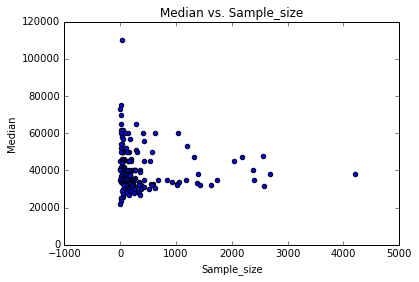

In [11]:
#Generate scatter plot to explore relation between Sample_size and Median
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')
plt.show()

In [19]:
#find correlation coefficient between the two factors
corr_coef=recent_grads[["Sample_size","Median"]].corr().loc["Sample_size","Median"]
corr_coef

-0.06447499542762182

We notice that the sample_size values for most majors tend to be close to each other, irrespective of median salaries values. We note also that the relationship between the two factors is not significant (correlation coefficient=-0.064) 

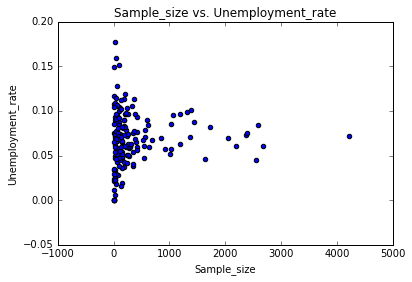

In [12]:
#Generate scatter plot to explore relation between Sample_size and Unemployment_rate
recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter",title="Sample_size vs. Unemployment_rate")
plt.show()

In [22]:
#find correlation coefficient between the two factors
recent_grads[["Sample_size","Unemployment_rate"]].corr().loc["Sample_size","Unemployment_rate"]

0.06295493699511234

We notice that the sample_size values for most majors tend to be close to each other, irrespective of Unemployment_rate values. We note also that the relationship between the two factors is not significant (correlation coefficient=0.063) 

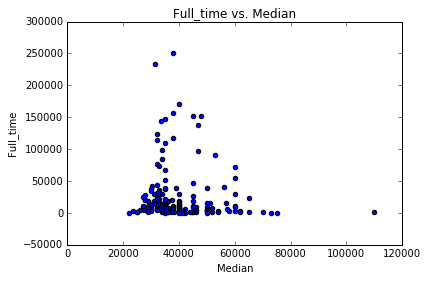

In [13]:
#Generate scatter plot to explore relation between Full_time and Median
recent_grads.plot(x="Median",y="Full_time",kind="scatter",title="Full_time vs. Median")
plt.show()

In [24]:
#find correlation coefficient b etween the two factors
recent_grads[["Median","Full_time"]].corr().loc["Median","Full_time"]

-0.07903093567520723

We notice that the Full_time values for most majors tend to be close to each other, irrespective of Median salaries values. We note also that the relationship between the two factors is not significant (correlation coefficient=-0.079) 

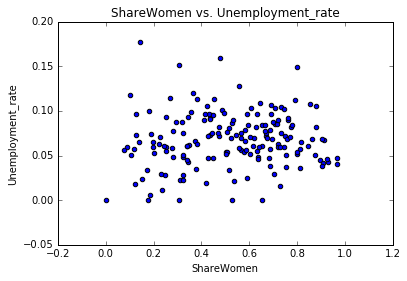

In [14]:
#Generate scatter plot to explore relation between Unemployment_rate and ShareWomen
recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter",title="ShareWomen vs. Unemployment_rate")
plt.show()

In [27]:
#find correlation coefficient b etween the two factors
recent_grads[["ShareWomen","Unemployment_rate"]].corr().loc["ShareWomen","Unemployment_rate"]

0.0732045786722932

We notice that the relationship between the two factors is not significant (correlation coefficient=0.073) 

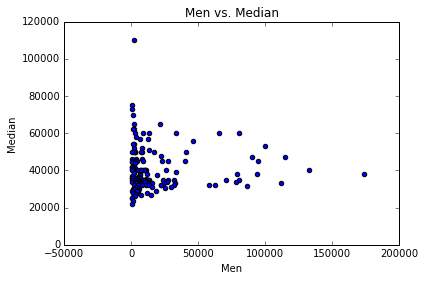

In [15]:
#Generate scatter plot to explore relation between Men and Median
recent_grads.plot(x="Men",y="Median",kind="scatter",title="Men vs. Median")
plt.show()

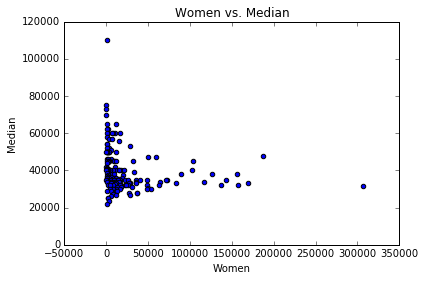

In [16]:
#Generate scatter plot to explore relation between Women and Median
recent_grads.plot(x="Women",y="Median",kind="scatter",title="Women vs. Median")
plt.show()

We notice that there is no significant relationship between median salary values and number of men from one side, and median salary values and number of women from other side.

# Exploring the distributions of the columns
We will generate histograms to explore the distributions of the following columns:
- Sample_size
- Median
- ShareWomen

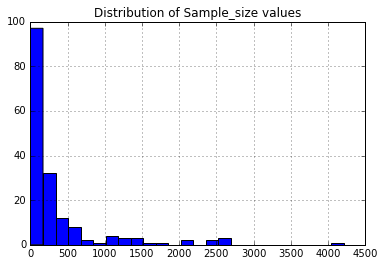

In [17]:
#Generate historam for Sample_size column
ax=recent_grads["Sample_size"].hist(bins=25)
ax.set_title("Distribution of Sample_size values")
plt.show()

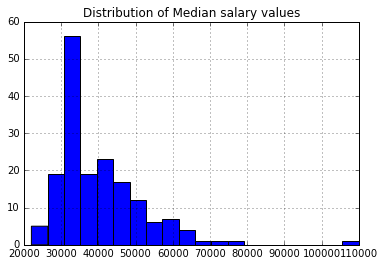

In [18]:
#Generate historam for Median column
ax1=recent_grads["Median"].hist(bins=20)
ax1.set_title("Distribution of Median salary values")
plt.show()

We notice that the most common median salary range is \\$30,000 - \\$40,000

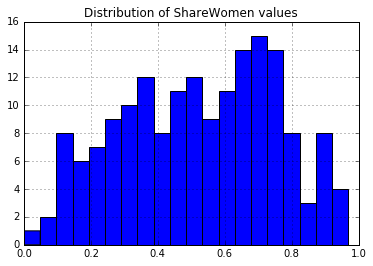

In [24]:
#Generate historam for ShareWomen column
ax2=recent_grads["ShareWomen"].hist(bins=20)
ax2.set_title("Distribution of ShareWomen values")
plt.show()

# Investigating Majors that are Predominantly Male and that Predominantly Female

We will further investigate the ShareWomen column, in order to figure out the majors that are predominantly female.

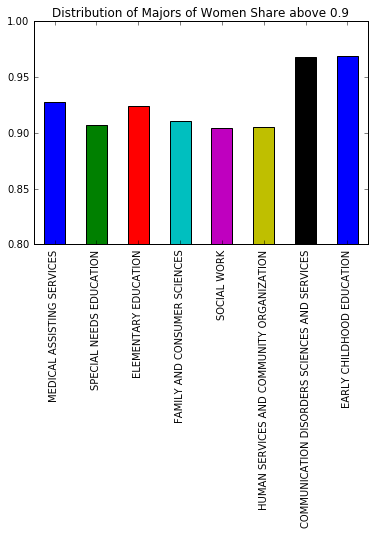

In [41]:
#Generate a bar plot of Major_category versus ShareWomen 
ax3=recent_grads[recent_grads["ShareWomen"]>=0.9].plot(x="Major",y="ShareWomen",kind="bar",legend=False)
ax3.set_xlabel("")
ax3.set_ylim((0.8,1))
ax3.set_title("Distribution of Majors of Women Share above 0.9")
plt.show()

We notice that the majors that are predominantly female (90% and above women share) are mostly in health and education sectors.  

Next, we will figure out the majors that are predominantly male.

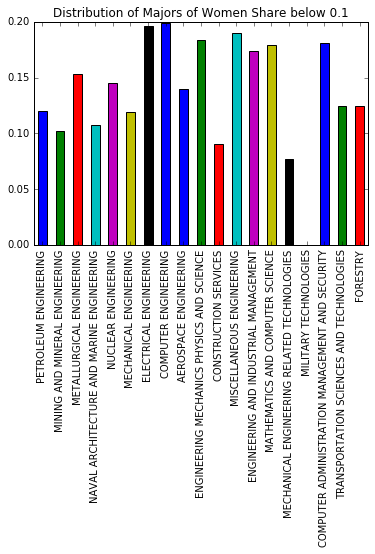

In [45]:
#Generate a bar plot of Major_category versus ShareWomen 
ax3=recent_grads[recent_grads["ShareWomen"]<=0.2].plot(x="Major",y="ShareWomen",kind="bar",legend=False)
ax3.set_xlabel("")
ax3.set_ylim((0,0.2))
ax3.set_title("Distribution of Majors of Women Share below 0.1")
plt.show()

We notice that the majors that are predominantly male (less than 0.2 women share) are mostly in engineering, construction and military sectors.

# Generating Scatter Matrices for Median, Sample_size and Unemployment rate values

In [53]:
#import pandas.plotting module
import pandas.plotting as pdplt

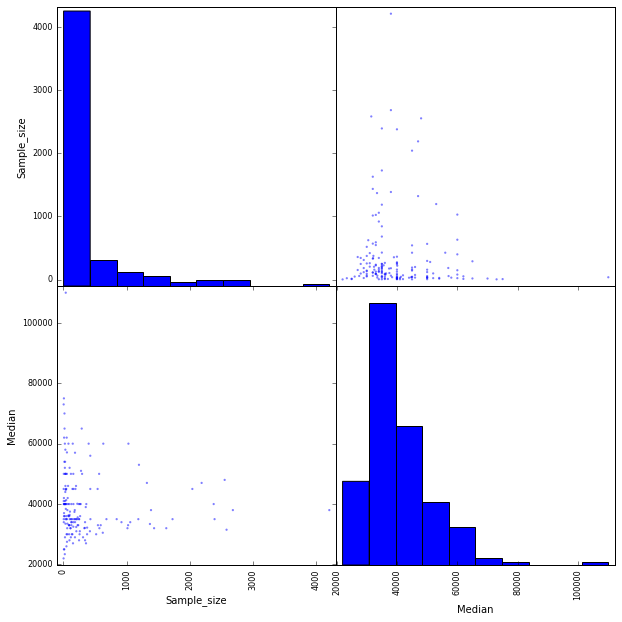

In [52]:
pdplt.scatter_matrix(recent_grads[["Sample_size","Median"]],figsize=(10,10))
plt.show()

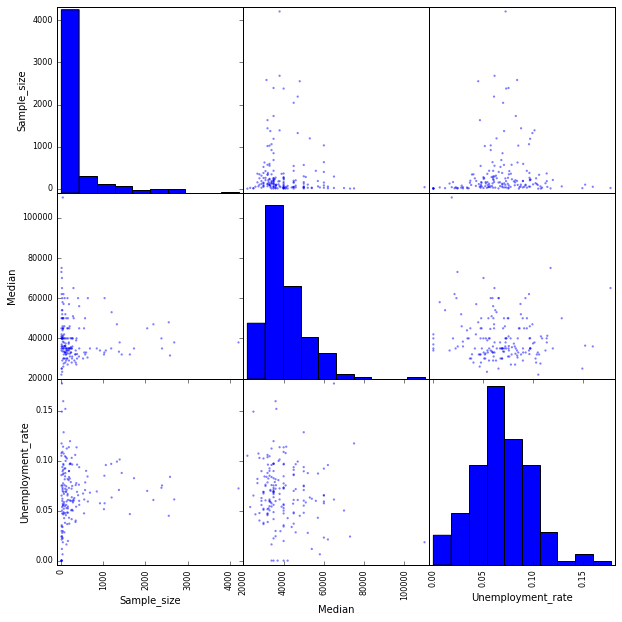

In [54]:
pdplt.scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]],figsize=(10,10))
plt.show()

# Generating bar plots for ShareWomen and Unemployment_rate columns

First, we will use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.

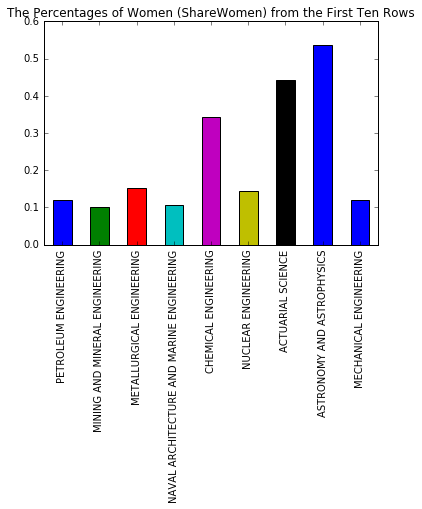

In [67]:
#The first ten rows
ax4=recent_grads[:9]["ShareWomen"].plot(kind="bar")
ax4.set_title("The Percentages of Women (ShareWomen) from the First Ten Rows")
ax4.set_xticklabels(recent_grads.iloc[:9]["Major"].tolist())
plt.show()

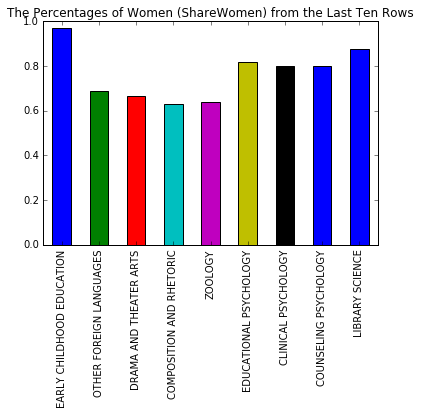

In [65]:
#The last ten rows
ax5=recent_grads[-9:]["ShareWomen"].plot(kind="bar")
ax5.set_title("The Percentages of Women (ShareWomen) from the Last Ten Rows")
ax5.set_xticklabels(recent_grads.iloc[-9:]["Major"].tolist())
plt.show()

Next, we will use bar plots to compare the percentages of unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

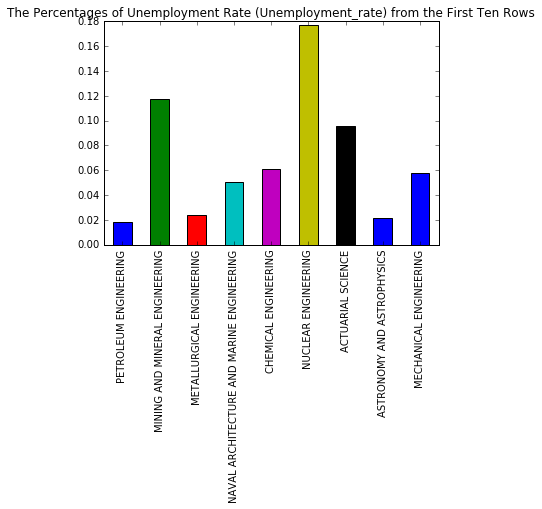

In [68]:
#The first ten rows
ax6=recent_grads[:9]["Unemployment_rate"].plot(kind="bar")
ax6.set_title("The Percentages of Unemployment Rate (Unemployment_rate) from the First Ten Rows")
ax6.set_xticklabels(recent_grads.iloc[:9]["Major"].tolist())
plt.show()

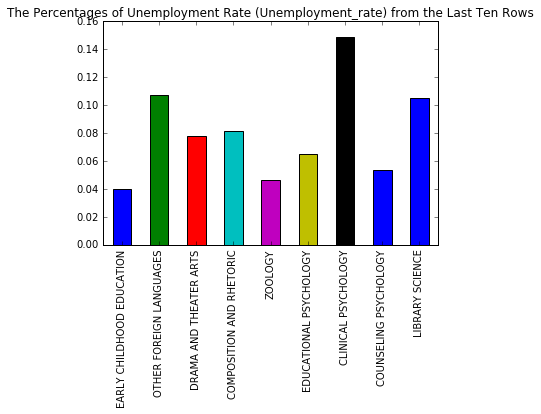

In [71]:
#The last ten rows
ax6=recent_grads[-9:]["Unemployment_rate"].plot(kind="bar")
ax6.set_title("The Percentages of Unemployment Rate (Unemployment_rate) from the Last Ten Rows")
ax6.set_xticklabels(recent_grads.iloc[-9:]["Major"].tolist())
plt.show()

# Investigating the correlation between ShareWoman and Median Salary values

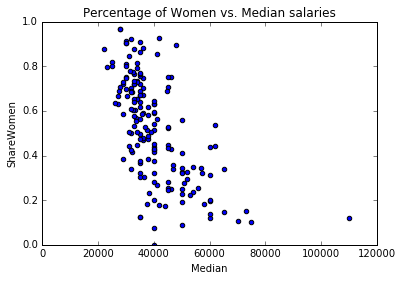

In [81]:
ax7=recent_grads.plot(x="Median",y="ShareWomen",kind="scatter")
ax7.set_ylim((0,1))
ax7.set_title("Percentage of Women vs. Median salaries")
plt.show()

In [80]:
recent_grads[["ShareWomen","Median"]].corr().loc["ShareWomen","Median"]

-0.618689751213161

We notice that there is a negative correlation between percentage of women in the workplace and median salary values, which might be a sign of a gender gap when it comes to salaries, as it appears that males might be getting paid higher salaries than women.   

# Generating Hexagonal Bin Plots 

Previously, we had dense scatter plots that were hard to visualize and understand. One solution is using hexagonal bin plots. Hexagonal binning plots density, rather than points. Points are binned into gridded hexagons and distribution.

We will start by plotting the hexagonal bin plot of Sample_size vs Median values

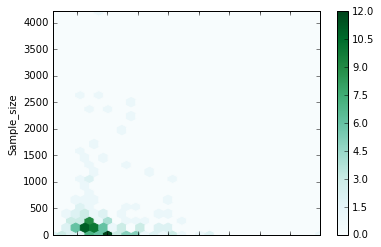

In [89]:
recent_grads.plot.hexbin(x="Median",y="Sample_size",gridsize=29)
plt.show()

Then, we will plot the hexagonal bin plot of Full_time vs Median values

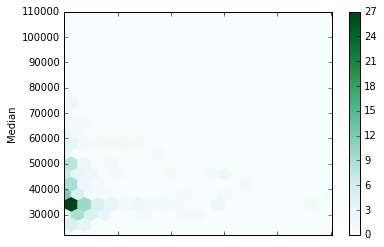

In [94]:
recent_grads.plot.hexbin(x="Full_time",y="Median",gridsize=20)
plt.show()

These plots verify our observations from the previous scatter plots studied at the beginning.